In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Preprocessing

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [34]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

<Axes: >

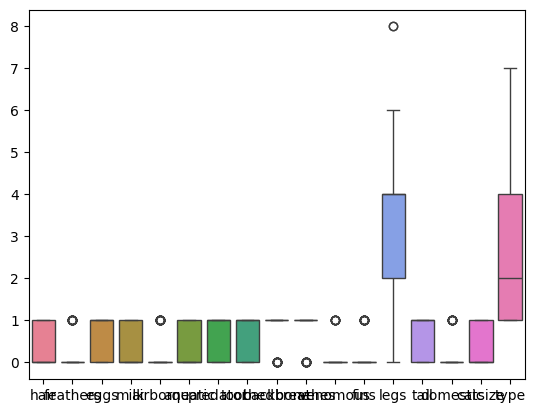

In [35]:
sns.boxplot(df)

<Axes: xlabel='type', ylabel='count'>

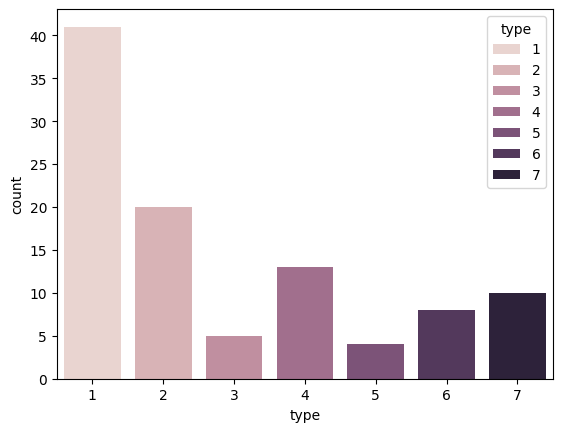

In [36]:
sns.countplot(x=df['type'],hue=df['type'],data=df)

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['type','animal name'])
y=df['type']
x_train,y_train,x_test,y_test=train_test_split(x,y,random_state=42)

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
kfold=KFold(n_splits=10)
model=KNeighborsClassifier(n_neighbors=10)
result=cross_val_score(model,x,y,cv=kfold)

In [39]:
print('Accuracy:',result.mean())

Accuracy: 0.78


Grid search

In [40]:
from sklearn.model_selection import GridSearchCV
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier()
grid=GridSearchCV(estimator=model1,param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [42]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


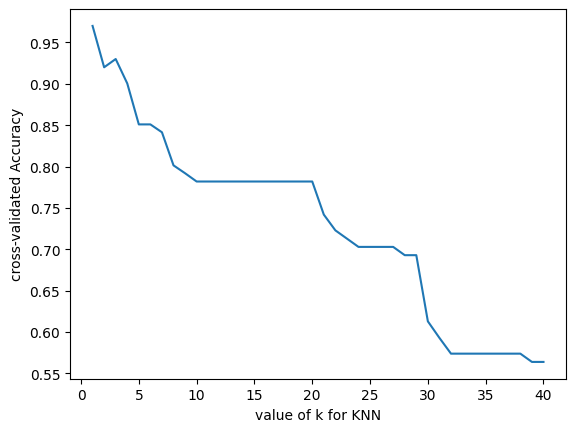

In [43]:
k_range=range(1,41)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=5)
    k_scores.append(scores.mean())

plt.plot(k_range,k_scores)
plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated Accuracy')
plt.show()

## Interview Questions

1. The number of nearest neighbours is the most key parameter for the knn algorithm. As it tells about number of nearest neighbors.

2. Euclidean distence is the most common distance metric used for knn algorithm.